### Standard Python + R setup and imports

Work in this notebook so I can test viz in R as well

In [22]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
%%R

# My commonly used R imports
require('tidyverse')

## Clean up

add the country of the Club involved. How do we add the club involved for over 30 countries?

In [25]:
# This is the not the original df, I have overwritten it
df = pd.read_csv('data/premier-league.csv')
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Middlesbrough FC,Tommy Wright,26.0,Left Winger,Leicester,€910Th.,in,Summer,0.91,Premier League,1992,1992/1993
1,Middlesbrough FC,Jonathan Gittens,28.0,defence,Southampton,€250Th.,in,Summer,0.25,Premier League,1992,1992/1993
2,Middlesbrough FC,Chris Morris,28.0,Right-Back,Celtic,?,in,Summer,NaN,Premier League,1992,1992/1993
3,Middlesbrough FC,Ben Roberts,17.0,Goalkeeper,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
4,Middlesbrough FC,Andy Todd,17.0,Centre-Back,Boro U18,-,in,Summer,NaN,Premier League,1992,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...,...
23493,Wolverhampton Wanderers,Luke Cundle,20.0,Central Midfield,Swansea,loan transfer,out,summer,NaN,Premier League,2022,2022/2023
23494,Wolverhampton Wanderers,Fábio Silva,20.0,Centre-Forward,RSC Anderlecht,loan transfer,out,summer,NaN,Premier League,2022,2022/2023
23495,Wolverhampton Wanderers,Ki-Jana Hoever,20.0,Right-Back,PSV Eindhoven,loan transfer,out,summer,NaN,Premier League,2022,2022/2023
23496,Wolverhampton Wanderers,Hee-chan Hwang,26.0,Centre-Forward,RB Leipzig,"End of loanJun 30, 2022",out,summer,NaN,Premier League,2022,2022/2023


## Doing a join with the country databases
We'll have to use fuzzy pandas and asses the damage after we get them in. 

In [29]:
#Also add the name of the country as a column so that we can read it in later
spain_df = pd.read_csv('spain_clubs.csv')
spain_df['country'] = 'Spain'
germany_df = pd.read_csv('germany_clubs.csv')
germany_df['country'] = 'Germany'
italy_df = pd.read_csv('italy_clubs.csv')
italy_df['country'] = 'Italy'
france_df = pd.read_csv('france_clubs.csv')
france_df['country'] = 'France'
scotland_df = pd.read_csv('scotland_clubs.csv')
scotland_df['country'] = 'Scotland'
belgium_df = pd.read_csv('belgium_clubs.csv')
belgium_df['country'] = 'Belgium'
turkey_df = pd.read_csv('turkey_clubs.csv')
turkey_df['country'] = 'Turkey'
korea_df = pd.read_csv('korea_clubs.csv')
korea_df['country'] = 'Korea'
japan_df = pd.read_csv('japan_clubs.csv')
japan_df['country'] = 'Japan'



# The Context

I found an academic paper that looks at ingredients in 

In [44]:
# 👉 sentences for context
%%R

ggplot(df, aes(x = MIX, fill = group)) + geom_bar()

UsageError: Line magic function `%%R` not found.


# The Chart

Read the dataframe in R and plot using ggplot

In [20]:
%%R

df <- read_csv('data/premier-league.csv')
# 👉 Your ggplot code here

Rows: 23498 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): club_name, player_name, position, club_involved_name, fee, transfer...
dbl (3): age, fee_cleaned, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'group' not found
Run `rlang::last_error()` to see where the error occurred.


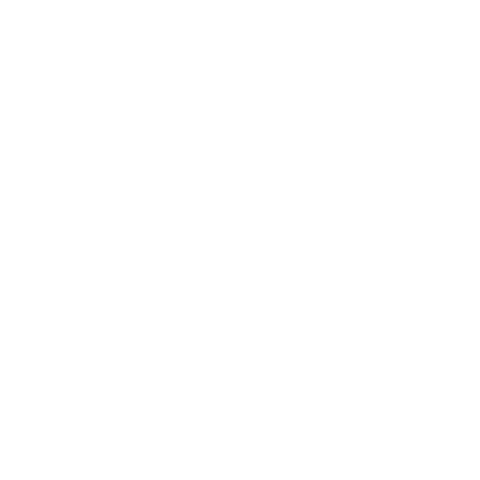

RRuntimeError: Error in geom_bar() : 
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'group' not found


In [57]:
%%R
